<a href="https://colab.research.google.com/github/MaferLedmar/Actividad5_RegresionLinealSimple/blob/main/Actividad5_Codigo_Mexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('Mexico_Clean.csv')
df = df.drop(columns='Unnamed: 0', axis = 1)
df.head()

,host_response_rate,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,room_type
0,100.0,91.5,1434.0,324,21.0,4.95,4.95,5.00,0.19,Entire home/apt
1,94.5,91.5,830.0,346,61.0,4.88,5.00,4.95,0.54,Entire home/apt
2,100.0,90.0,1469.0,87,39.0,4.71,4.92,4.58,0.31,Entire home/apt
3,94.5,91.5,1062.7,363,0.0,4.70,4.80,4.80,1.70,Entire home/apt
4,100.0,86.0,1062.7,357,64.0,4.70,4.78,4.98,0.46,Entire home/apt


In [ ]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
df_hotel = df[df['room_type'] == 'Hotel room']
df_private = df[df['room_type'] == 'Private room']

### **Hotel room**

In [ ]:
Corr_Factors1 = df_hotel.corr()
Corr_Factors1 = abs(Corr_Factors1)

<ipython-input-39-6ff91464ddba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors1 = df_hotel.corr()


<Axes: >

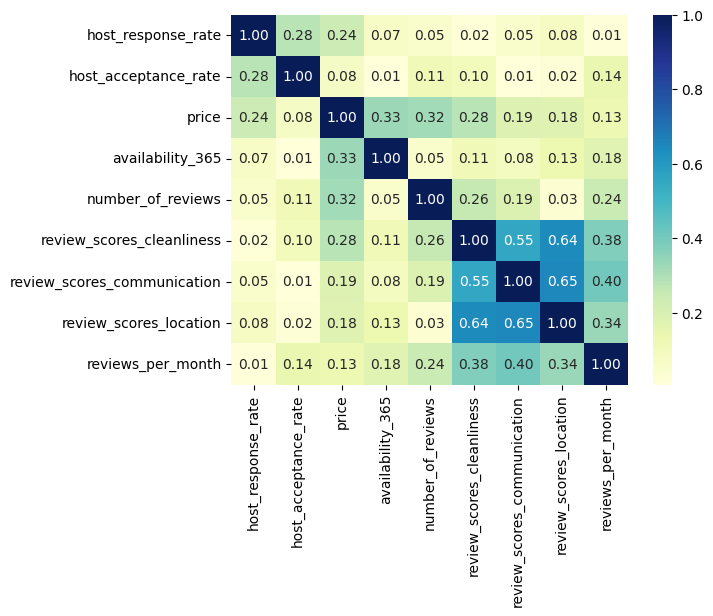

In [ ]:
# COEFICIENTES DE COORELACIÓN
Heat_Map1 = sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot = True, fmt = '.2f')
Heat_Map1

<Axes: >

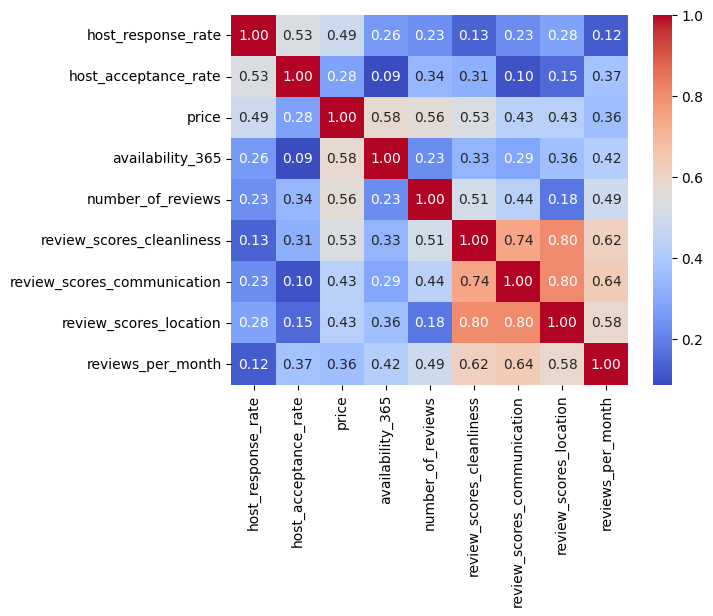

In [ ]:
#COEFICIENTES DE DETERMINACIÓN
Heat_Map12 = sns.heatmap(Corr_Factors1**0.5, cmap = 'coolwarm', annot = True, fmt = '.2f')
Heat_Map12

In [ ]:
vars_Indep = df_hotel[['review_scores_location']]
var_Dep = df_hotel['review_scores_communication']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X = vars_Indep, y = var_Dep)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.70363637]),
 'rank_': 1,
 'singular_': array([1.26586126]),
 'intercept_': 1.425115667692355}

## **Modelo matemático: y = 0.70363637x + 1.425115667692355**

In [ ]:
y_pred = model.predict(X = df_hotel[['review_scores_location']])
len(y_pred)

127

In [ ]:
df_hotel.insert(0, 'Predicciones', y_pred)
df_hotel

,Predicciones,host_response_rate,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,room_type
14,4.823679,90.0,87.0,1006.0,340,23.0,4.83,5.0,4.83,0.18,Hotel room
53,4.922188,90.0,87.0,1006.0,332,31.0,4.94,5.0,4.97,0.25,Hotel room
55,4.943297,90.0,87.0,908.0,350,49.0,4.92,5.0,5.00,0.46,Hotel room
62,4.908116,90.0,87.0,908.0,356,22.0,4.95,5.0,4.95,0.25,Hotel room
66,4.943297,100.0,86.0,1062.7,287,7.0,5.00,5.0,5.00,0.07,Hotel room
...,...,...,...,...,...,...,...,...,...,...,...
9495,4.943297,100.0,100.0,0.0,0,3.0,5.00,5.0,5.00,0.12,Hotel room
9537,4.802570,94.5,91.5,0.0,0,0.0,4.70,4.8,4.80,1.70,Hotel room
9539,4.802570,94.5,100.0,0.0,0,0.0,4.70,4.8,4.80,1.70,Hotel room
9544,4.802570,94.5,91.5,0.0,0,0.0,4.70,4.8,4.80,1.70,Hotel room


<Axes: xlabel='review_scores_location', ylabel='review_scores_communication'>

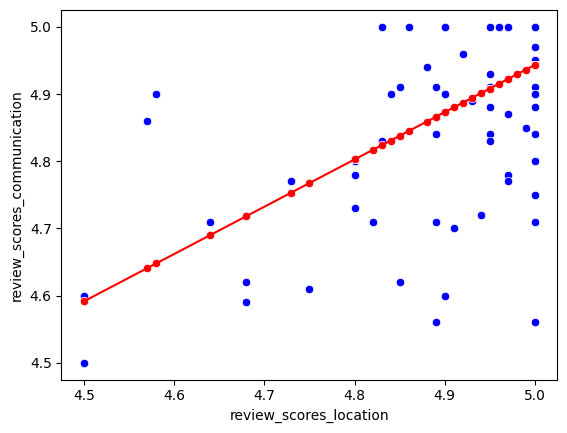

In [ ]:
sns.scatterplot(x = 'review_scores_location', y = 'review_scores_communication', color = 'blue', data = df_hotel)
sns.scatterplot(x = 'review_scores_location', y = 'Predicciones', color = 'red', data = df_hotel)
sns.lineplot(x = 'review_scores_location', y = 'Predicciones', color = 'red', data = df_hotel)

### **Private room**

In [ ]:
Corr_Factors2 = df_private.corr()
Corr_Factors2 = abs(Corr_Factors2)

<ipython-input-47-8b1489623d4e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors2 = df_private.corr()


<Axes: >

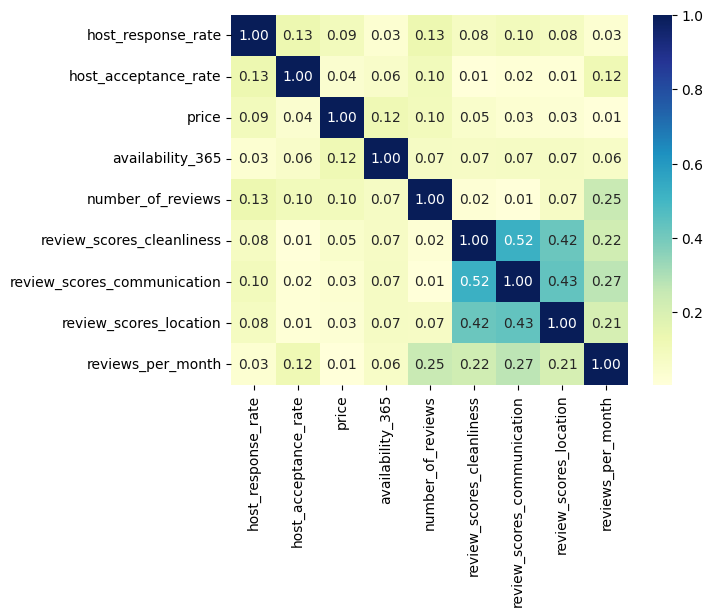

In [ ]:
#CORRELACIÓN
Heat_Map2 = sns.heatmap(Corr_Factors2, cmap = 'YlGnBu', annot = True, fmt = '.2f')
Heat_Map2

<Axes: >

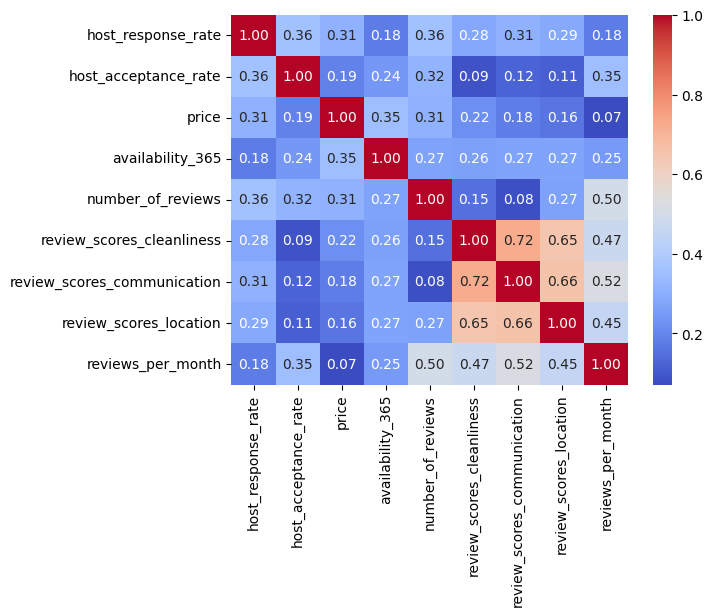

In [ ]:
#COEFICIENTE DE DETERMINACIÓN
Heat_Map22 = sns.heatmap(Corr_Factors2**0.5, cmap = 'coolwarm', annot = True, fmt = '.2f')
Heat_Map22

In [ ]:
vars_Indep = df_private[['review_scores_communication']]
var_Dep = df_private['review_scores_cleanliness']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X = vars_Indep, y = var_Dep)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.71767622]),
 'rank_': 1,
 'singular_': array([10.54409856]),
 'intercept_': 1.3020142362024165}

## **Modelo matemático: y = 0.71767622x + 1.3020142362024165**

In [ ]:
y_pred = model.predict(X = df_private[['review_scores_communication']])
y_pred

array([4.85451153, 4.60332485, 4.7468601 , ..., 4.7468601 , 4.7468601 ,
       4.7468601 ])

In [ ]:
df_private.insert(0, 'Predicciones', y_pred)
df_private

,Predicciones,host_response_rate,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,room_type
7,4.854512,100.0,100.0,1089.0,168,62.0,4.9,4.95,4.94,0.94,Private room
16,4.603325,94.5,97.3,726.0,363,5.0,4.8,4.60,4.80,0.04,Private room
17,4.746860,98.6,91.5,375.0,284,5.0,4.6,4.80,4.90,0.04,Private room
18,4.746860,94.5,97.3,2835.0,365,0.0,4.7,4.80,4.80,1.70,Private room
21,4.746860,100.0,91.5,1244.0,88,0.0,4.7,4.80,4.80,1.70,Private room
...,...,...,...,...,...,...,...,...,...,...,...
24200,4.746860,94.5,91.5,1280.0,301,0.0,4.7,4.80,4.80,1.70,Private room
24213,4.746860,94.5,91.5,750.0,176,0.0,4.7,4.80,4.80,1.70,Private room
24215,4.746860,100.0,100.0,600.0,345,0.0,4.7,4.80,4.80,1.70,Private room
24218,4.746860,94.5,100.0,251.0,364,0.0,4.7,4.80,4.80,1.70,Private room


<Axes: xlabel='review_scores_communication', ylabel='review_scores_cleanliness'>

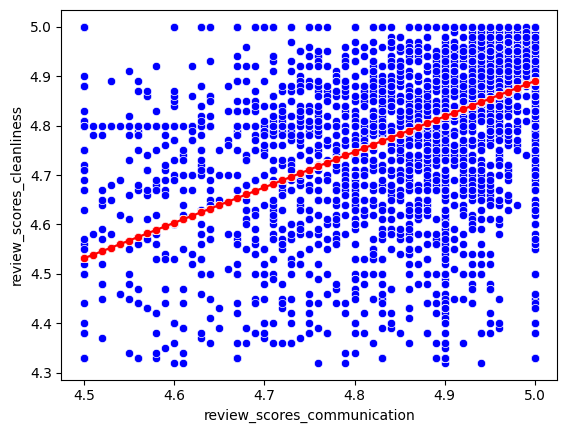

In [ ]:
sns.scatterplot(x = 'review_scores_communication', y = 'review_scores_cleanliness', color = 'blue', data = df_private)
sns.scatterplot(x = 'review_scores_communication', y = 'Predicciones', color = 'red', data = df_private)
sns.lineplot(x = 'review_scores_communication', y = 'Predicciones', color = 'red', data = df_private)